![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [1]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [5]:
penguins_df['sex'].value_counts()

sex
MALE      167
FEMALE    165
Name: count, dtype: int64

In [6]:
df = penguins_df.copy()
df['sex'] = df['sex'].map({'MALE':0, 'FEMALE':1})
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
3,36.7,19.3,193.0,3450.0,1
4,39.3,20.6,190.0,3650.0,0


In [7]:

model = KMeans(n_clusters=3)
model.fit(df)
labels = model.predict(df)
print(labels)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 0 0 0 0 2 0 0 0 0 2 0 2 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 2 2 0 0 2 0 0 0
 2 0 2 0 0 2 0 2 0 2 0 0 0 0 0 0 0 2 0 2 0 2 0 2 0 2 0 0 0 2 0 2 0 0 0 2 0
 2 0 2 0 0 0 0 2 0 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 0 0 0 2 0 2 0 2 0 2 0 0
 0 0 0 0 0 0 0 2 0 2 0 2 0 0 0 2 0 0 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 0 2 0 0 2 0 0 0 0 2 0 2 0 0 0 2 0 0 0 0 0 2 0 0 0 2 0 2 0 2 0 0 0 2 0 2
 2 0 0 0 0 2 0 2 0 0 0 2 0 2 0 0 0 2 0 0 2 0 0 2 0 0 2 0 2 1 2 1 1 2 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 1 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 2 1 2 1 2 2 1 2 2
 1 1 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 1 2 1 2 1 1 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 1 1 2 1 2 1 1 2 2 1 2 1 1 1 1 2 1 2 1 1 1 2 1 2 1 1 1 2 1 1 1]


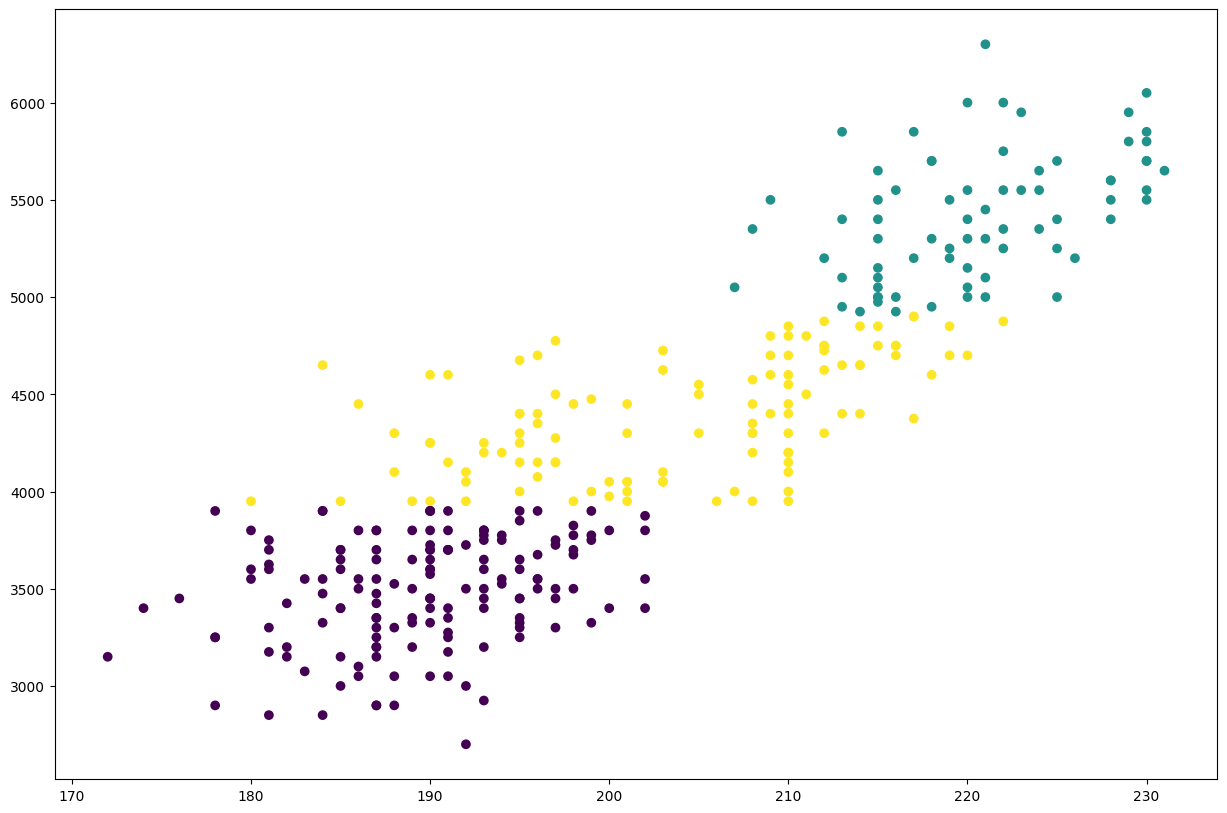

In [16]:
import matplotlib.pyplot as plt
xs = df.loc[:,'flipper_length_mm']
ys = df.loc[:,'body_mass_g']
plt.figure(figsize=(15,10))
plt.scatter(xs, ys, c=labels)
plt.show()

In [18]:
df['species_labels'] = labels
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species_labels
0,39.1,18.7,181.0,3750.0,0,0
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,36.7,19.3,193.0,3450.0,1,0
4,39.3,20.6,190.0,3650.0,0,0


In [21]:
stat_penguins = df.groupby(by='species_labels')[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].mean()

In [22]:
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species_labels,,,,
0,41.128667,18.001333,189.633333,3490.500000
1,48.918056,15.509722,220.458333,5421.180556
2,44.760000,17.071818,203.690909,4387.727273
